# HW 5 - Coherence, Interference, and Diffraction

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

The wave nature of light leads to one of its most useful properties - interference. Since light is an oscillating electric field and since the net electric field is the sum of the electric fields from all sources, one can have any degree of constructive and destructive interference. The light field radiated by one dipole can be described by

\begin{equation}\Large
E(z, t) = E^0(t)e^{i\left(\vec{k} \cdot \vec{z} -\omega t\right)}
\end{equation}

and that radiated by many dipoles can be described by

\begin{equation}\Large
E(z, t) = \sum_n E^0(t) e^{i\left(\vec{k_n} \cdot \vec{z_n} -\omega_n t_n\right)}
\end{equation}

The intensity (mks units) is calculated by finding

\begin{equation}\Large
I = \frac{c \epsilon_0 n_{\mathrm{index}} \xi}{2}|E(z, t)|^2
\end{equation}

The cross-terms that result from $|E(z, t)|^2$ represent the interference between the two waves. For two waves,

\begin{equation}\Large
E(z, t) = E^0_1(t) e^{i\left(\vec{k_1} \cdot \vec{z_1}-\omega_1 t_1\right)} + E^0_2(t) e^{i\left(\vec{k_2} \cdot \vec{z_2}-\omega_2 t_2\right)} 
\end{equation}

and the cross-terms have the form

\begin{equation}\Large
E^0_1(t)E^0_2(t)e^{i\left(\vec{k_1}\cdot\vec{z_1}-\vec{k_2}\cdot\vec{z_2}-\omega_1 t_1 + \omega_2 t_2\right)}
\end{equation}

If $t_1=t_2$ and $\omega_1=\omega_2$, this equation predicts interference fringes that depend on $\vec{k_1}\cdot\vec{z_1}-\vec{k_2}\cdot\vec{z_2}$. This homework looks at different casees for these spatial fringes.

One can also have temporal fringes that are the analog of spatial fringes. In this case, we would keep constant values of $z$, $k$, and $\omega$ and examine how the electric field and the intensity vary in time. Temporal fringes play the central role in making femtosecond ultrafast laser pulses. But we will concentrate on spatial fringes.

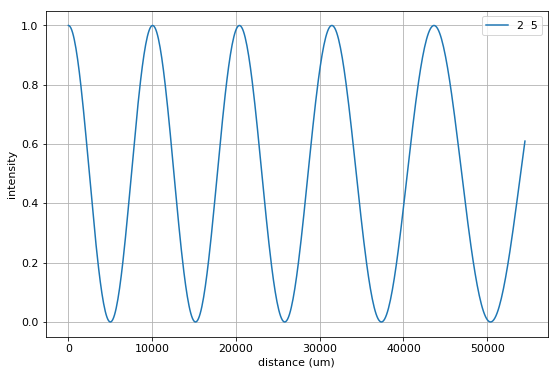

In [5]:
wavelength = 0.5  # um

# screen
dist = 1e5  # um
n_screen_points = 500
theta = 0.001
screen_coords = np.zeros((3, n_screen_points))
screen_coords[0] = dist
screen_coords[2] = dist*np.tan((np.arange(n_screen_points)*theta))

# 2 slits 5 microns
n_sources = 2
d_sources = 5  # um
source_coords = np.zeros((3, n_sources))
source_coords[2] = np.arange(n_sources) * d_sources
delta = np.sqrt(np.sum((source_coords[:, :, None]-screen_coords[:, None, :])**2, axis=0))
E = np.sum(np.exp(2*np.pi*1j*delta/wavelength), axis=0)
I = np.real(E*np.conj(E) / (n_sources)**2)
plt.plot(screen_coords[2], I)


# finish plot
plt.xlabel('distance (um)')
plt.ylabel('intensity')
plt.grid()
plt.legend(['2  5'], loc='best')
plt.savefig('fringes.png', dpi=300)